In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ls

expl.ipynb  Exploratory.ipynb  processing.ipynb


In [55]:
data = pd.read_csv("../../data/phase-02/data.csv")

In [9]:
#data = data[data['cc_p80_perc'] < 40][['date', 'x', 'y', 'harvested', 'ndvi', 'cc_p80_perc']]

In [10]:
data

,date,x,y,harvested,ndvi,cc_p80_perc
0,2016-12-22,1536,1024,1338,0.376255,0.5
1,2017-01-01,1536,1024,2927,0.320048,39.6
2,2017-01-11,1536,1024,386,0.386997,12.8
3,2017-02-10,1536,1024,30,0.533278,12.9
5,2017-03-02,1536,1024,229,0.491631,11.5
...,...,...,...,...,...,...
4610,2019-06-20,7680,10240,30110,0.582090,0.0
4611,2019-06-30,7680,10240,39957,0.531163,0.0
4612,2019-07-20,7680,10240,49296,0.490081,0.0
4613,2019-07-30,7680,10240,53750,0.444711,0.8


In [57]:
data['date'] = pd.to_datetime(data['date'], format=('%Y-%m-%d'),utc=True)

data.shape

(4615, 15)

In [39]:
data.loc[2,:]

date           2017-01-11 00:00:00+00:00
x                                   1536
y                                   1024
harvested                            386
ndvi                            0.386997
cc_p80_perc                         12.8
Name: 2, dtype: object

In [53]:
sns.set(rc={'figure.figsize':(11, 8)})

def plot(data, tiles, row, var, cloud):
    x = tiles.loc[row, 'tile_x']
    y = tiles.loc[row, 'tile_y']
    print("x:%s, y:%s" % (x, y))
    
    df = data[(data['x'] == x) & (data['y'] == y)]

    fig, ax = plt.subplots(1, 1)

    ln1 = ax.plot(df[df[var] < cloud]['date'], df[df[var] < cloud]['ndvi'], 'bo-', alpha=0.7, label='NDVI', color='green', linestyle='--')

    ax2 = ax.twinx()
    ln2 = ax2.plot(df[df[var] < cloud]['date'], df[df[var] < cloud]['harvested'], 'bo-', color='black',alpha=0.7, label='Harvested')

    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    plt.draw()


In [43]:
#x = 1536
#y = 1024
row = 3
x = data.loc[1, 'x']
y = data.loc[1, 'y']
print("x:%s, y:%s" % (x, y))
tiles = pd.read_csv("../../data/1_raw/tiles.csv")
tiles

x:1536, y:1024


,tile,N_dates,tile_x,tile_y
0,1536_1024,71,1536,1024
1,1536_1536,71,1536,1536
2,2048_1024,71,2048,1024
3,2048_1536,71,2048,1536
4,4608_4608,71,4608,4608
...,...,...,...,...
60,7680_5120,71,7680,5120
61,7680_5632,71,7680,5632
62,7680_9728,71,7680,9728
63,8192_10240,71,8192,10240


x:1536, y:1536


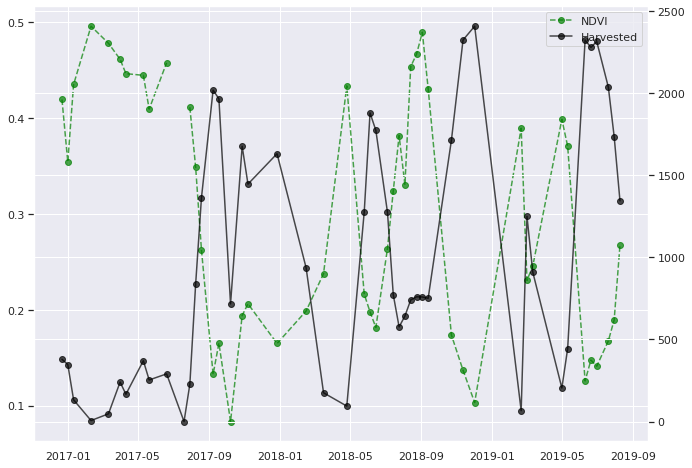

In [79]:
plot(data, tiles, 1, 'cc_p20_perc', 50)

x:1536, y:1536


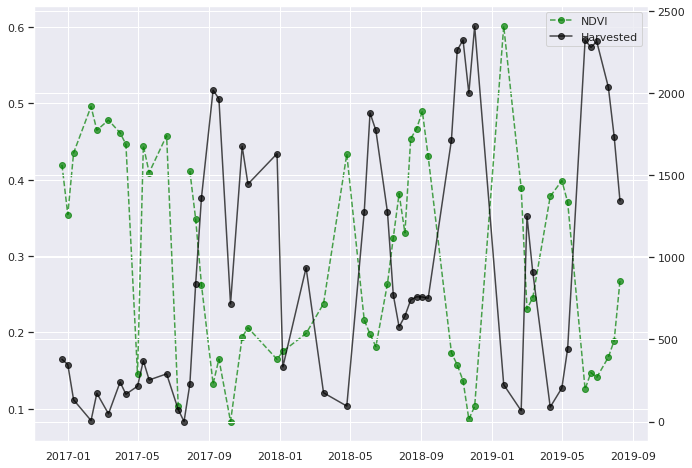

In [78]:
plot(data, tiles, 1, 'cc_p80_perc', 35)

In [60]:
sns.set(rc={'figure.figsize':(11, 8)})

def plot2(data, tiles, row, var, cloud):
    x = tiles.loc[row, 'tile_x']
    y = tiles.loc[row, 'tile_y']
    print("x:%s, y:%s" % (x, y))
    
    df = data[(data['x'] == x) & (data['y'] == y)]

    fig, ax = plt.subplots(1, 1)

    ln1 = ax.plot(df[df[var] < cloud]['date'], df[df[var] < cloud]['ndvi'], 'bo-', alpha=0.7, label='NDVI', color='green', linestyle='--')

    ax2 = ax.twinx()
    ln2 = ax2.plot(df[df[var] < cloud]['date'], df[df[var] < cloud]['harvested'], 'bo-', color='black',alpha=0.7, label='Harvested')

    df[var] = df[var]/100 
    ln3 = ax.plot(df[df[var] < (cloud/100)]['date'], df[df[var] < (cloud/100)][var], 'bo-', color='gray',alpha=0.7, label='Cloud Coverage', linestyle='--')

    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    plt.draw()

x:1536, y:1536


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


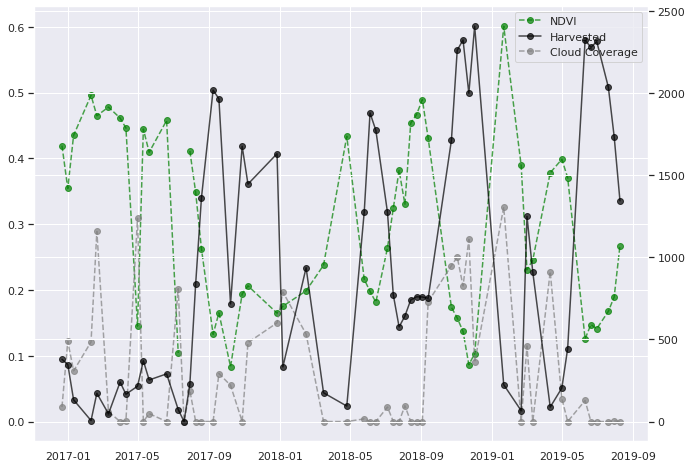

In [72]:
plot2(data, tiles, 1, 'cc_p80_perc', 35)
#x:2048, y:1024, double harvest in 2017?

x:1536, y:1536


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


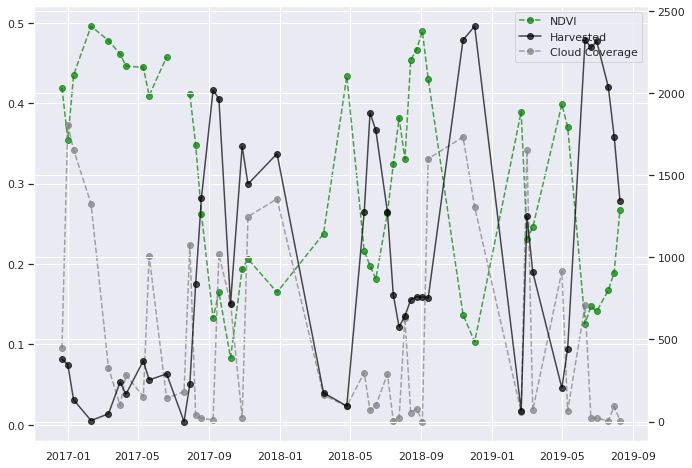

In [82]:
plot2(data, tiles, 1, 'cc_p20_perc', 40)


x:5120, y:5120


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


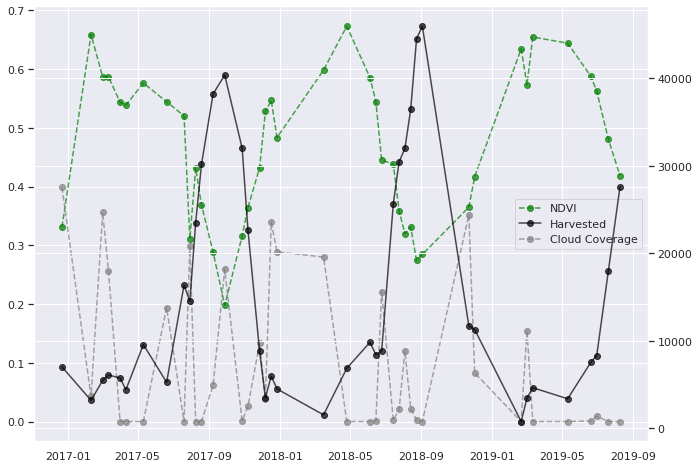

In [90]:
plot2(data, tiles, 11, 'cc_p20_perc', 40)
